In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Global_SuperStore.csv', encoding= 'latin1')
#we use encoding= 'latin1' for handling text data
df.head()   #To print first 5 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
df.shape

#number of rows=51290, number of columns=24

(51290, 24)

# A). Data Preprocessing


## 1). Check Null-values 

In [4]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [5]:
df['Postal Code']

0        10024.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285        NaN
51286    77095.0
51287    93030.0
51288        NaN
51289        NaN
Name: Postal Code, Length: 51290, dtype: float64

In [6]:
print(f'Postal Code contains {41296*100/51290} % null values')

Postal Code contains 80.51472021836615 % null values


### Inference
We can drop the Postal Code column as it contains null values more than 80%. 

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [8]:
df.drop('Postal Code',axis=1, inplace=True)
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

## 2). Check Datatype

In [9]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

## 3). Check Duplicates

In [10]:
df.duplicated().sum()

0

## 4). Extract all categorical columns and numerical columns

In [11]:
cat_cols=df.select_dtypes(include='object').columns 
num_cols=df.select_dtypes(exclude='object').columns 
print(cat_cols)
print(num_cols)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')
Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')


# B). Univariate EDA
Statistical or visual analysis of single column

## 1. Find value counts of categorial columns namely Category, Segment, Sub Category, Region, Ship Model and Market.Depict the following:-

a) Category count on a bar chart(matplotlib).</br>
b) Sub-Category on a horizontal bar chart (matplotlib).</br>
c) Segment on a Pie Chart(matplotlib).</br>
d) Region on a bar chart seaborn).</br>
e) Ship Mode on a tine chart(matplotlib).</br>
f) Market on a ara chart (matplotlib).

In [12]:
cat_cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')

In [13]:
a1=df['Category'].value_counts()
a1

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

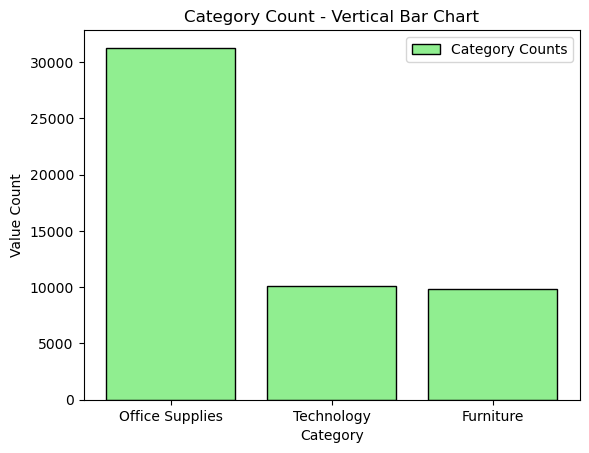

In [14]:
plt.bar(a1.index,a1.values,color='lightgreen',edgecolor='black',label= 'Category Counts')
plt.xlabel('Category')
plt.ylabel('Value Count')
plt.title('Category Count - Vertical Bar Chart')
plt.legend()
plt.show

In [15]:
a2=df['Sub-Category'].value_counts()
a2

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

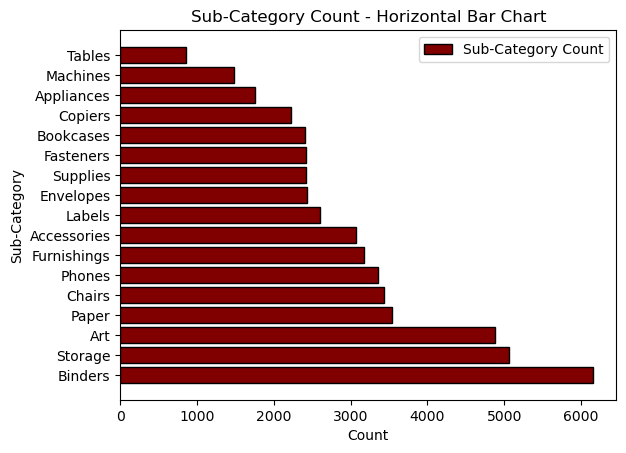

In [16]:
plt.barh(a2.index,a2.values,color='maroon',edgecolor='black',label='Sub-Category Count')
plt.xlabel('Count')
plt.ylabel('Sub-Category')
plt.title('Sub-Category Count - Horizontal Bar Chart')
plt.legend()
plt.show

In [17]:
a3=df['Segment'].value_counts()
a3

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

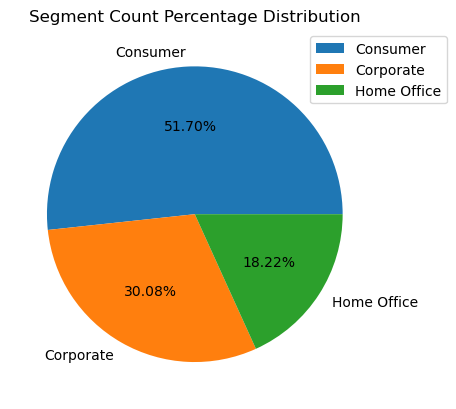

In [18]:
plt.pie(a3.values,labels=a3.index,autopct='%.2f%%')
plt.title('Segment Count Percentage Distribution')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show

In [19]:
a4=df['Region'].value_counts()
a4

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

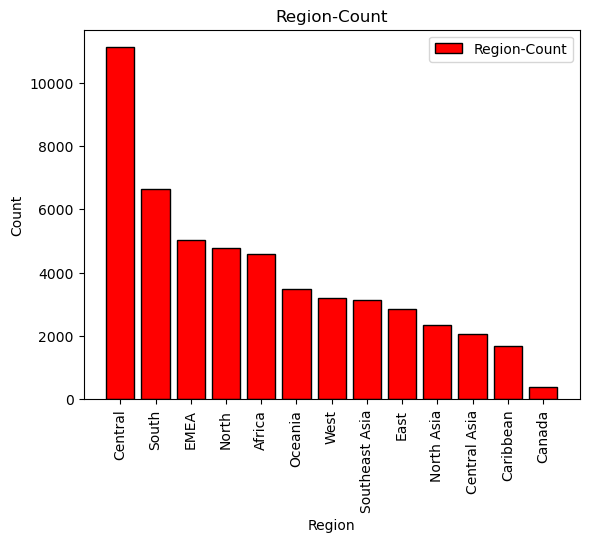

In [20]:
plt.bar(a4.index,a4.values,color='red',edgecolor='black',label='Region-Count')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region-Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

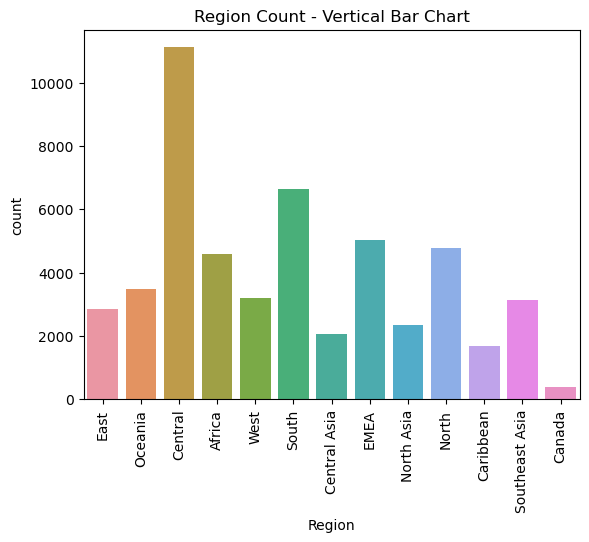

In [21]:
sns.countplot(x=df['Region'])
plt.title('Region Count - Vertical Bar Chart')
plt.xticks(rotation=90)
plt.show()

In [22]:
a5=df['Ship Mode'].value_counts()
a5

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

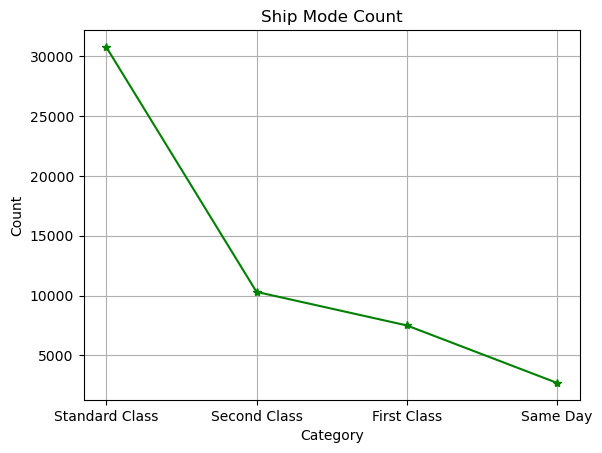

In [23]:
plt.plot(a5.index,a5.values,color='green',marker='*')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Ship Mode Count')
plt.grid()
plt.show()

In [24]:
a6=df['Market'].value_counts()
a6

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

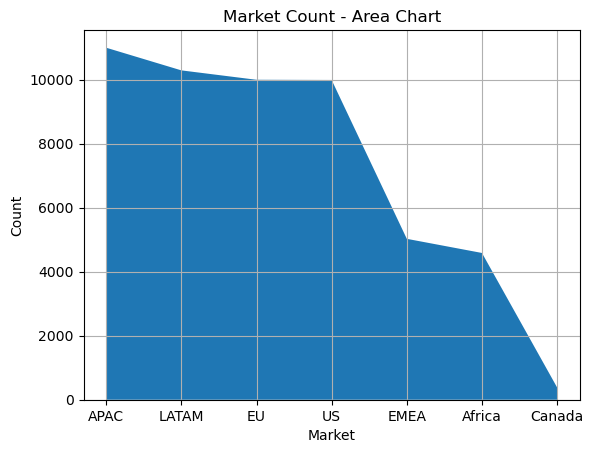

In [25]:
plt.stackplot(a6.index,a6.values)
plt.xlabel('Market')
plt.ylabel('Count')
plt.title('Market Count - Area Chart')
plt.grid()
plt.show()

## 2). Plot the following:-

 a). Histogram for discount </br>
 b).Displot for quantity

In [26]:
df['Discount']

0        0.0
1        0.1
2        0.1
3        0.1
4        0.0
        ... 
51285    0.0
51286    0.8
51287    0.0
51288    0.0
51289    0.0
Name: Discount, Length: 51290, dtype: float64

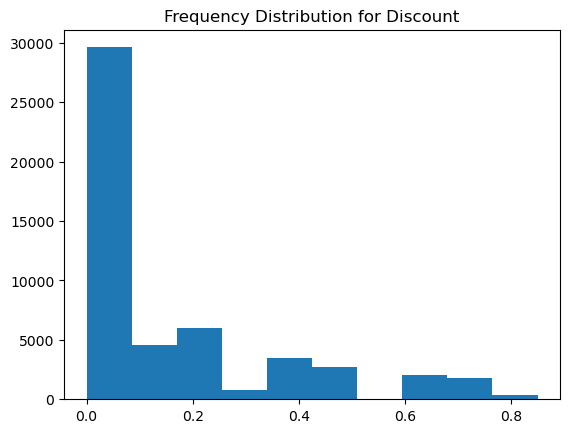

In [27]:
plt.hist(df['Discount'])
plt.title('Frequency Distribution for Discount')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

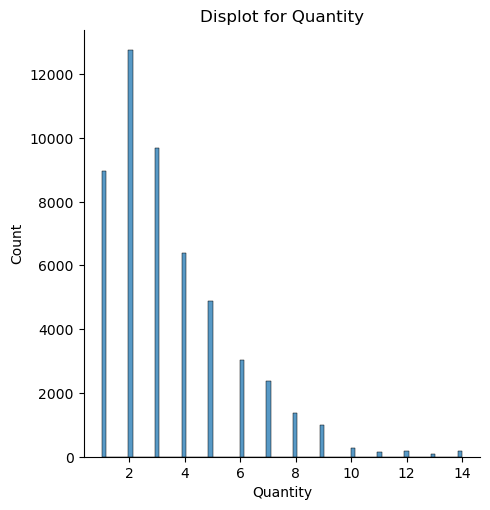

In [28]:
sns.displot(x=df['Quantity'])
plt.title('Displot for Quantity')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

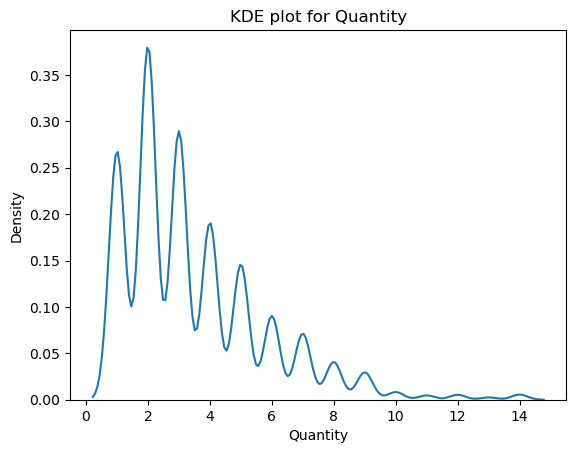

In [29]:
sns.kdeplot(x=df['Quantity'])
plt.title('KDE plot for Quantity')
plt.show

# B). Bivariate EDA
Statistical or visual analysis of 2 variable.

## 1). Depict the following on Scatter Plot
a). Sales vs Profit </br>
b).Profit vs Shipping Cost

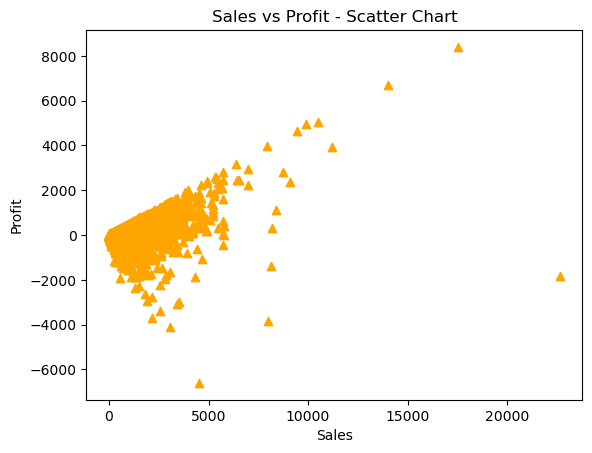

In [30]:
plt.scatter(x=df['Sales'],y=df['Profit'],color='orange',marker='^')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit - Scatter Chart')
plt.show()

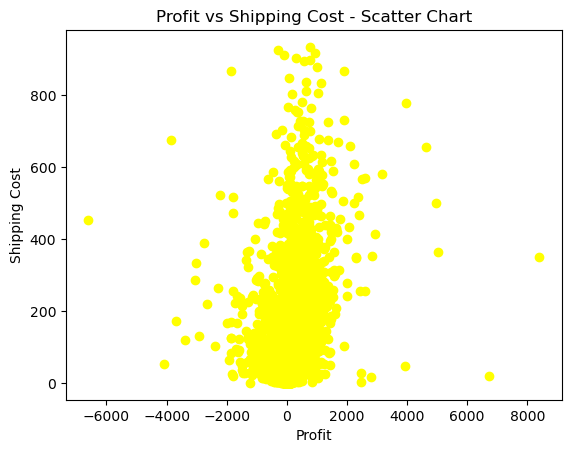

In [31]:
plt.scatter(x=df['Profit'],y=df['Shipping Cost'],color='yellow',marker='o')
plt.xlabel('Profit')
plt.ylabel('Shipping Cost')
plt.title('Profit vs Shipping Cost - Scatter Chart')
plt.show()

## 2). Depict the boxplot for the following:-

a).Quantity based on Segment. </br>
b).Discount based on ship mode.

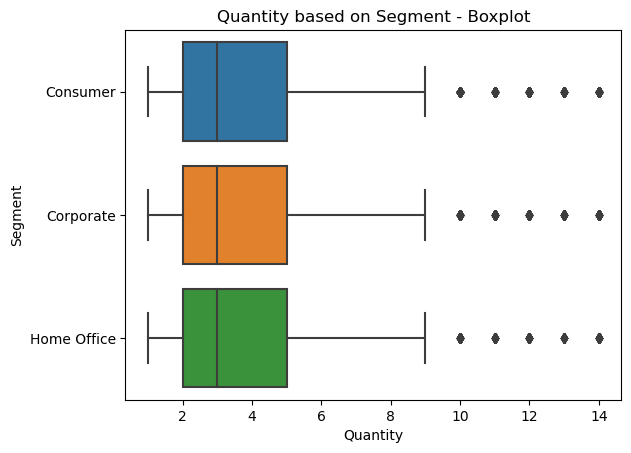

In [32]:
sns.boxplot(x=df['Quantity'],y=df['Segment'])
plt.title('Quantity based on Segment - Boxplot')
plt.show()

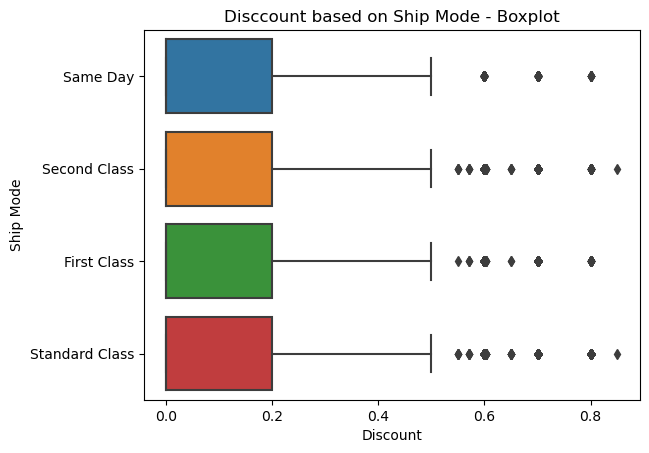

In [33]:
sns.boxplot(x=df['Discount'],y=df['Ship Mode'])
plt.title('Disccount based on Ship Mode - Boxplot')
plt.show()

## 3). Depict the following on Violin Plot
a).Discount vs Market </br>
b).Quantity vs Category  Cost

<function matplotlib.pyplot.show(close=None, block=None)>

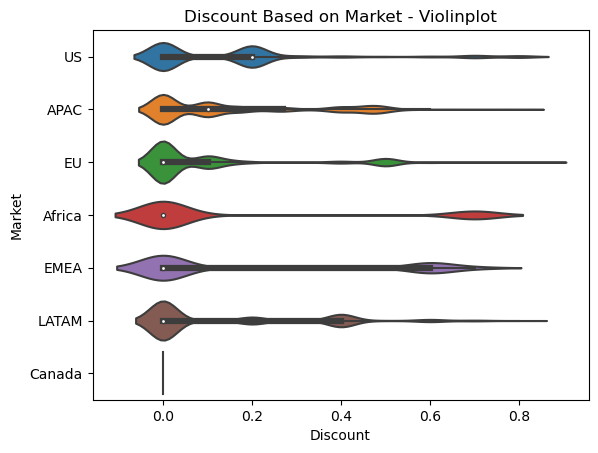

In [34]:
sns.violinplot(x=df['Discount'],y=df['Market'])
plt.title('Discount Based on Market - Violinplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

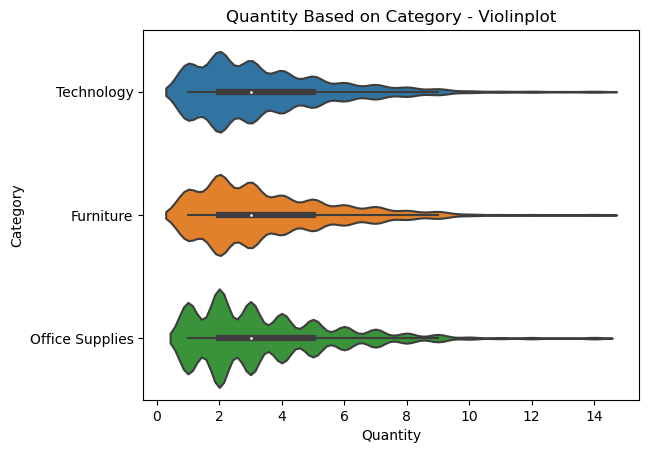

In [35]:
sns.violinplot(x=df['Quantity'],y=df['Category'])
plt.title('Quantity Based on Category - Violinplot')
plt.show

## 4). Plot the pairplot for all the categorical variables including ['Sales', 'Quantity', 'Discount', 'Profit'].

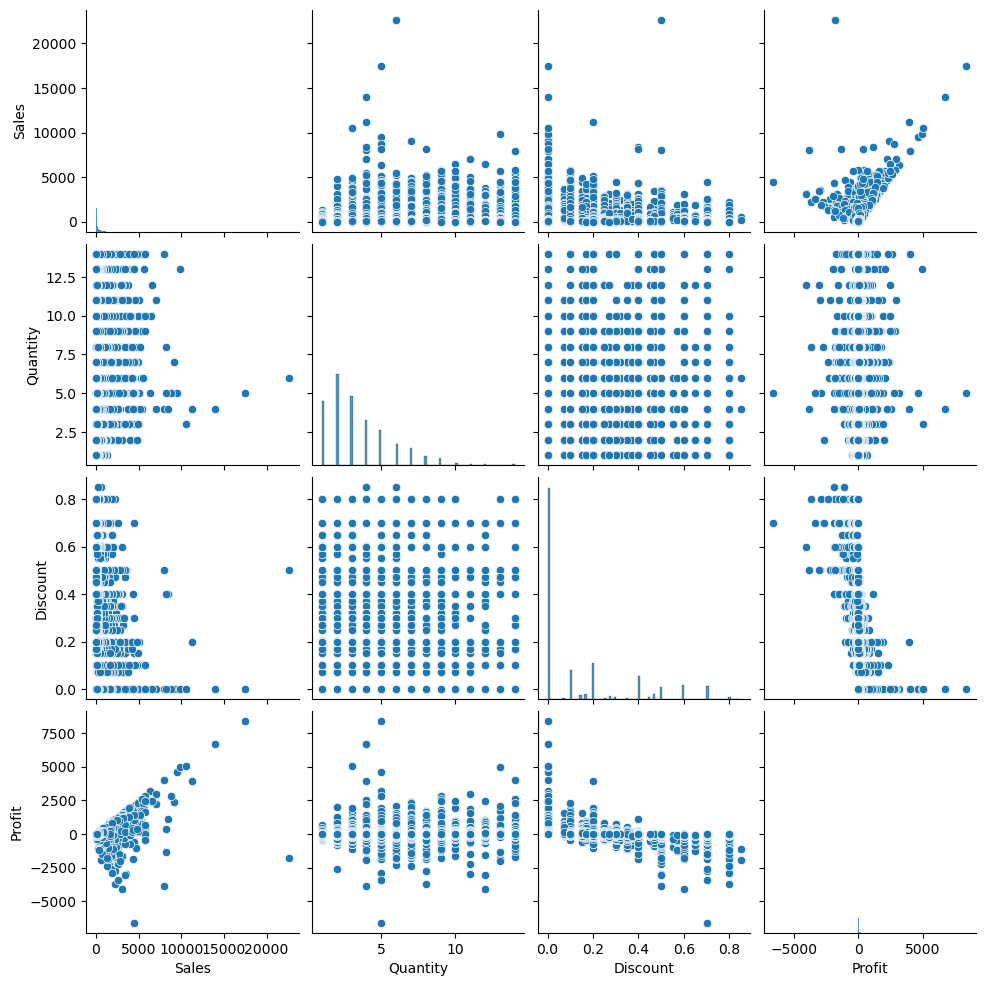

In [38]:
sns.pairplot(df, vars = ['Sales', 'Quantity', 'Discount', 'Profit'])
plt.show()

## 5). Depict Correlation on a heatmap.

In [41]:
corr= df.corr()
corr

C:\Users\SUDARSHAN PANDEY\AppData\Local\Temp\ipykernel_18172\98420504.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,-0.043889,-0.173483,0.087594,-0.019037,-0.039076
Sales,-0.043889,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,-0.086722,-0.019875,1.000000,-0.316490,-0.079055
Profit,-0.019037,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039076,0.768073,0.272649,-0.079055,0.354441,1.000000


C:\Users\SUDARSHAN PANDEY\AppData\Local\Temp\ipykernel_18172\3787342265.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


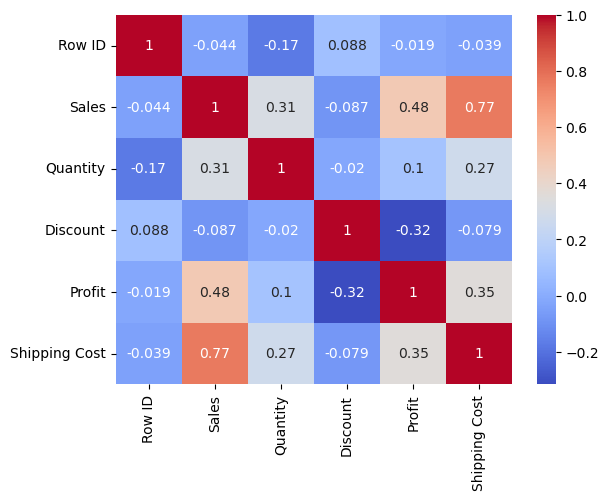

In [42]:
corr= df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()